In [1]:
from fastai.vision.all import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
dataroot_dir = Path("/content/drive/MyDrive/train/train/labeled_data")

In [7]:
my_list_of_images = dataroot_dir.ls()

In [8]:
my_list_of_images

(#2) [Path('/content/drive/MyDrive/train/train/labeled_data/images'),Path('/content/drive/MyDrive/train/train/labeled_data/labels')]

In [ ]:
[item/'images' for item in my_list_of_images]

[Path('/content/drive/MyDrive/train/train/labeled_data/images/images'),
 Path('/content/drive/MyDrive/train/train/labeled_data/labels/images')]

In [9]:
images = get_image_files(dataroot_dir/'images')

In [10]:
print(f"Found {len(images)} images.")
print(images[:5])

Found 50 images.
[Path('/content/drive/MyDrive/train/train/labeled_data/images/0007.png'), Path('/content/drive/MyDrive/train/train/labeled_data/images/0008.png'), Path('/content/drive/MyDrive/train/train/labeled_data/images/0003.png'), Path('/content/drive/MyDrive/train/train/labeled_data/images/0005.png'), Path('/content/drive/MyDrive/train/train/labeled_data/images/0017.png')]


In [11]:
images

(#50) [Path('/content/drive/MyDrive/train/train/labeled_data/images/0007.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0008.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0003.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0005.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0017.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0009.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0018.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0012.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0016.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0010.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0001.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0006.png'),Path('/content/drive/MyDrive/train/train/labeled_data/images/0019.png'),Path('/content/drive/MyDrive/train/train/labeled_data/ima

In [ ]:
im = images[0]; im

Path('/content/drive/MyDrive/train/train/labeled_data/images/0007.png')

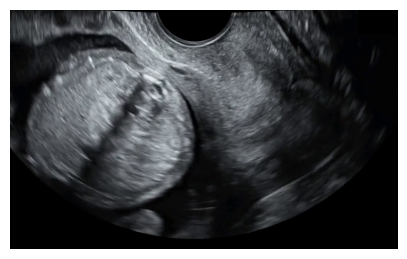

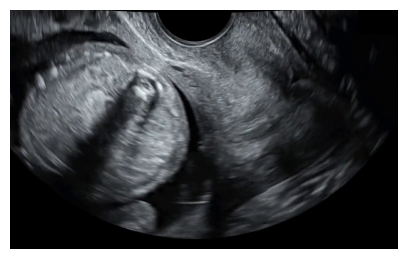

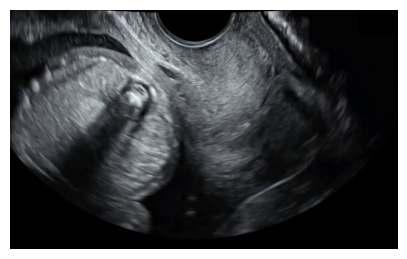

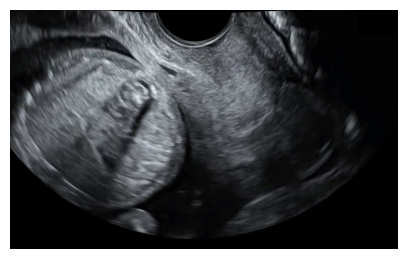

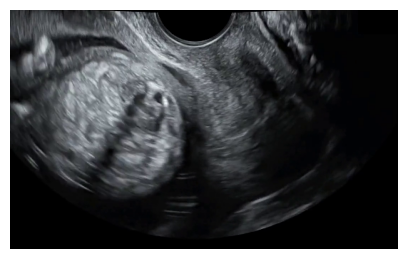

In [ ]:
ims = [PILImage.create(many_images) for many_images in images];
for i in range(5):
  ims[i].show()

In [ ]:
np.unique(ims)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
labels = get_image_files(dataroot_dir/'labels')

In [13]:
labels

(#50) [Path('/content/drive/MyDrive/train/train/labeled_data/labels/0003.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0001.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0002.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0004.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0035.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0013.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0012.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0033.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0027.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0039.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0014.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0008.png'),Path('/content/drive/MyDrive/train/train/labeled_data/labels/0019.png'),Path('/content/drive/MyDrive/train/train/labeled_data/lab

In [ ]:
lbl = labels[5]

In [ ]:
lbl

Path('/content/drive/MyDrive/train/train/labeled_data/labels/0013.png')

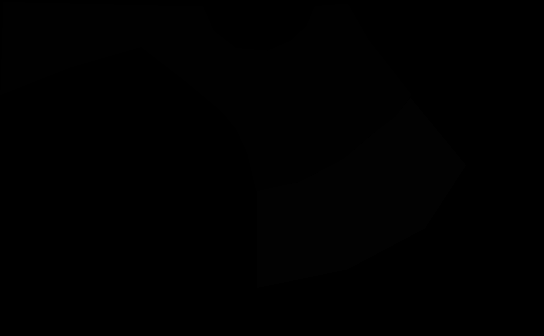

In [ ]:
PILImage.create(lbl)

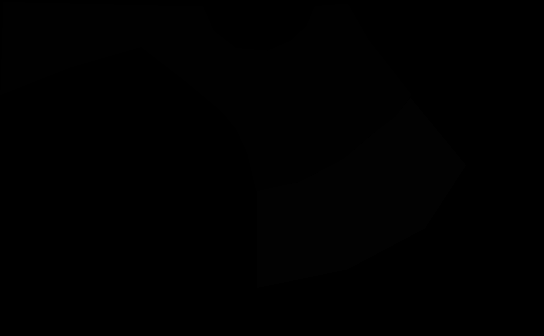

In [ ]:
msk = PILImage.create(lbl); msk

In [ ]:
np.unique(msk)

array([0, 1, 2], dtype=uint8)

In [ ]:
np.unique(im)

array([Path('/content/drive/MyDrive/train/train/labeled_data/images/0007.png')],
      dtype=object)

In [14]:
cervicalcode =('background','anterior', 'posterior')


In [15]:
cervicaldatablocks = (ImageBlock, MaskBlock(codes=cervicalcode))
def get_y(x): return(str(x).replace('images', 'labels'))

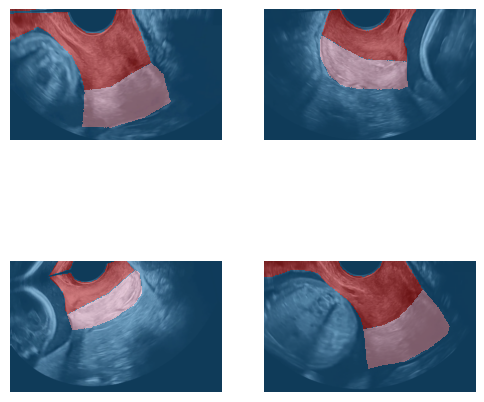

In [17]:
datablock = DataBlock(
    blocks= cervicaldatablocks,
    get_items=get_image_files,
    get_y = get_y,
    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])
dls = datablock.dataloaders(dataroot_dir/'images', bs=4)
dls.show_batch()

In [18]:
!pip install segmentation-models-pytorch
import segmentation_models_pytorch as smp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [19]:
num_classes = 3
model= smp.DeepLabV3Plus(
    encoder_name="efficientnet-b7",
    encoder_weights="imagenet",
    in_channels=3,
    classes= num_classes,
    activation =None
    )

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:02<00:00, 107MB/s] 


In [20]:
Tverskyloss = smp.losses.TverskyLoss(mode='multilabel', log_loss=False)
def tversky_loss(y_pred, y_true):
  y_true = F.one_hot(y_true, num_classes=num_classes).permute(0,3,1,2).float()
  return Tverskyloss(y_pred, y_true)
  def criterion(y_pred, y_true):
      fl=FocalLossFlat(axis=1)(y_pred, y_true)
      tl=tversky_loss(y_pred, y_true)
      return fl+tl

In [21]:
Learn = Learner(dls, model, loss_func=FocalLossFlat(axis=1), metrics= [foreground_acc, DiceMulti(axis=1)], opt_func=ranger).to_fp16()

In [ ]:
Learn.fine_tune(10)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,foreground_acc,dice_multi,time
